In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import random
import os 
from sklearn.metrics import f1_score, precision_score, recall_score


In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale

import geopandas as gpd
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon

from geopy.geocoders import Nominatim
from transliterate import translit

from multiprocessing import Pool as PoolSklearn
import tqdm
from sklearn.metrics import f1_score

from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.model_selection import train_test_split as tts

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('train_initial.csv')
del df_train['Unnamed: 0']

In [6]:
df_train.head()

,id,atm_group,address,address_rus,lat,long,target
0,8526.0,32.0,"EMELYANOVA,34 Y-SAKHALINSK","улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...",46.940995,142.738319,0.011500
1,8532.0,32.0,"KOMSOMOLSKAYA,259B Y.SAKHALINSK","Комсомольская улица, 259, Южно-Сахалинск, Саха...",46.937353,142.753348,0.029710
2,8533.0,32.0,"KOMMUN. PR., 32 YUZHNO SAKHAL","Коммунистический проспект, Южно-Сахалинск, Сах...",46.959413,142.741113,0.009540
3,8684.0,32.0,"LENINGRADSKIY PR.,76A MOSCOW","Ленинградский проспект, 76А, Москва, Россия, 1...",55.805827,37.515146,-0.094035
4,37.0,32.0,"GVARDEYSKAYA PL., 2 NORILSK","Гвардейская площадь, 2, Норильск, Красноярский...",69.343541,88.211228,0.079277


In [7]:
def get_region(row:str) -> str:
    if type(row) == str:
        arr = row.split(',')
        for elem_idx in range(len(arr)):
            if arr[elem_idx].strip() == 'Россия':
                res = arr[elem_idx-1].strip()
                if type(res) == str:
                    return res
                    break
                else:
                    return np.nan
    else:
        return row

In [8]:
def get_city(row:str) -> str:
    if type(row) == str:
        return row.split(',')[2].strip()
    else:
        return row

In [9]:
df_train['city'] = df_train['address_rus'].apply(get_city)
df_train['region'] = df_train['address_rus'].apply(get_region)

In [12]:
df_train.isna().sum()

id               0
atm_group        0
address          0
address_rus    304
lat            304
long           304
target           0
city           304
region         304
dtype: int64

In [ ]:
df_train = df_train.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    pd.get_dummies(df_train).drop(['id', 'target'], axis=1),
    pd.get_dummies(df_train)['target'],
    test_size=0.2,
    random_state=13)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)
predicts = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predicts)

80766.8346904284

In [12]:
DEFAULT_RANDOM_SEED = 42

In [13]:
def seedBasic(seed:int=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seedBasic(DEFAULT_RANDOM_SEED)

In [14]:
df = pd.read_csv('train_full.csv', index_col='Unnamed: 0')

In [15]:
df

,id,atm_group,address,address_rus,lat,long,target,city,city_area,city_district,...,supermarket,warehouse,religious,church,government,station,tram,platform,administrative,population
0,8532.0,32.0,"KOMSOMOLSKAYA,259B Y.SAKHALINSK","Комсомольская улица, 259, Южно-Сахалинск, Саха...",46.937353,142.753348,0.029710,Южно-Сахалинск,городской округ Южно-Сахалинск,XIV микрорайон,...,2,0,0,0,0,0,0,1,0,4680
1,8533.0,32.0,"KOMMUN. PR., 32 YUZHNO SAKHAL","Коммунистический проспект, Южно-Сахалинск, Сах...",46.959413,142.741113,0.009540,Южно-Сахалинск,городской округ Южно-Сахалинск,Центр,...,0,0,0,0,0,0,0,0,0,312
2,8684.0,32.0,"LENINGRADSKIY PR.,76A MOSCOW","Ленинградский проспект, 76А, Москва, Россия, 1...",55.805827,37.515146,-0.094035,Москва,NaN,NaN,...,0,0,0,0,0,1,0,4,3,6990
3,37.0,32.0,"GVARDEYSKAYA PL., 2 NORILSK","Гвардейская площадь, 2, Норильск, Красноярский...",69.343541,88.211228,0.079277,Норильск,городской округ Норильск,NaN,...,0,0,0,0,0,0,0,4,2,3420
4,313.0,32.0,"RUSSKAYA, 16 VLADIVOSTOK","Русская улица, 16, Владивосток, Приморский кра...",43.165860,131.908212,-0.145001,Владивосток,Владивостокский городской округ,NaN,...,0,0,0,0,0,0,0,1,0,1260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6253,4421.0,8083.0,"STROITELEY, 43 Novokuznetsk","проспект Строителей, 43, Новокузнецк, Кемеровс...",53.769459,87.117251,0.062220,Новокузнецк,Новокузнецкий городской округ,NaN,...,0,0,0,0,0,0,0,0,0,0
6254,4422.0,8083.0,"Rublevskoye sh, 62 Moskva","Рублёвское шоссе, 62, Москва, Россия, 121609",55.766212,37.380875,0.108743,Москва,NaN,NaN,...,0,0,0,0,0,0,0,1,3,54
6255,4426.0,8083.0,"EFANOVA, 22 Zyryanskoye","улица Ефанова, 22, село Зырянское, Зырянский р...",56.838223,86.640829,0.148938,NaN,Зырянский район,NaN,...,0,0,0,0,0,0,0,0,0,9
6256,4429.0,8083.0,"OMMUNISTICHESKAYA,10A Kizhinga","Коммунистическая улица, 10А, село Кижинга, Киж...",51.848725,109.905102,0.089919,NaN,Кижингинский район,NaN,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df['target'] = minmax_scale(df['target'], feature_range=(1, 5), axis=0)
df['target'] = df['target'].apply(np.round).apply(int)

In [17]:
df['target'].value_counts()

target
2    2809
3    1845
4     661
1     552
5     391
Name: count, dtype: int64

In [18]:
df.columns

Index(['id', 'atm_group', 'address', 'address_rus', 'lat', 'long', 'target',
       'city', 'city_area', 'city_district', 'federal_district', 'fast_food',
       'cafe', 'bar', 'pub', 'restaurant', 'college', 'kindergarten',
       'library', 'training', 'school', 'traffic_park', 'university',
       'bicycle_parking', 'bus_station', 'car_sharing', 'fuel', 'parking',
       'taxi', 'atm', 'payment_terminal', 'bank', 'bureau_de_change',
       'money_transfer', 'payment_centre', 'clinic', 'hospital', 'pharmacy',
       'social_facility', 'cinema', 'community_centre', 'conference_centre',
       'events_venue', 'exhibition_centre', 'nightclub', 'social_centre',
       'theatre', 'police', 'post_box', 'post_office', 'toilets',
       'internet_cafe', 'marketplace', 'apartments, detached', 'detached',
       'hotel', 'residential', 'commercial', 'industrial', 'kiosk', 'office',
       'retail', 'supermarket', 'warehouse', 'religious', 'church',
       'government', 'station', 'tram', 'plat

In [19]:
cat_features=[
    'atm_group', 'city', 'city_area', 
    'city_district', 'federal_district',
    'administrative'
    ]

df[cat_features] = df[cat_features].fillna('no_data')
df['administrative'] = df['administrative'].apply(str)
df['atm_group'] = df['atm_group'].apply(str)
df = df.fillna(0)

In [20]:
def fit_model(train_pool:Pool, validation_pool:Pool, **kwargs) -> CatBoostClassifier:
    model = CatBoostClassifier(
        iterations=30000,
        random_seed=DEFAULT_RANDOM_SEED,
        learning_rate=0.001,
        eval_metric='AUC',
        early_stopping_rounds=2000,
        use_best_model= True,
        task_type='CPU',
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=100,
    )

In [21]:
df.reset_index(drop=True, inplace=True)

df_train_val = df.drop(['id', 'address', 'address_rus','target'], axis=1)
y_train_val = df['target']
X_train, X_val, y_train, y_val = tts(
    df_train_val, y_train_val, 
    shuffle=True, 
    stratify=y_train_val, 
    train_size=0.85,
    random_state=DEFAULT_RANDOM_SEED
    )

In [22]:
train_pool = Pool(
    X_train, y_train,
    cat_features=[
        'atm_group', 'city', 'city_area', 
        'city_district', 'federal_district',
        'administrative'
        ]
)

validation_pool = Pool(
    X_val, y_val,
    cat_features=[
        'atm_group', 'city', 'city_area', 
        'city_district', 'federal_district',
        'administrative'
        ]
)

print('Train dataset shape: {}\n'.format(train_pool.shape))

model = fit_model(train_pool, validation_pool)

Train dataset shape: (5319, 68)

0:	test: 0.8009304	best: 0.8009304 (0)	total: 188ms	remaining: 1h 34m 13s
100:	test: 0.8363469	best: 0.8367044 (61)	total: 2.75s	remaining: 13m 33s
200:	test: 0.8396846	best: 0.8396881 (199)	total: 5.2s	remaining: 12m 51s
300:	test: 0.8423002	best: 0.8423005 (299)	total: 7.79s	remaining: 12m 48s
400:	test: 0.8464244	best: 0.8464928 (399)	total: 10.5s	remaining: 12m 54s
500:	test: 0.8494262	best: 0.8494298 (496)	total: 13.1s	remaining: 12m 52s
600:	test: 0.8505680	best: 0.8506126 (599)	total: 16.4s	remaining: 13m 20s
700:	test: 0.8537480	best: 0.8537990 (698)	total: 19.1s	remaining: 13m 18s
800:	test: 0.8556014	best: 0.8556329 (794)	total: 21.7s	remaining: 13m 12s
900:	test: 0.8575055	best: 0.8575055 (900)	total: 24.5s	remaining: 13m 10s
1000:	test: 0.8593056	best: 0.8593160 (997)	total: 27.2s	remaining: 13m 8s
1100:	test: 0.8616795	best: 0.8616795 (1100)	total: 29.9s	remaining: 13m 5s
1200:	test: 0.8629991	best: 0.8629991 (1200)	total: 32.9s	remaining: 

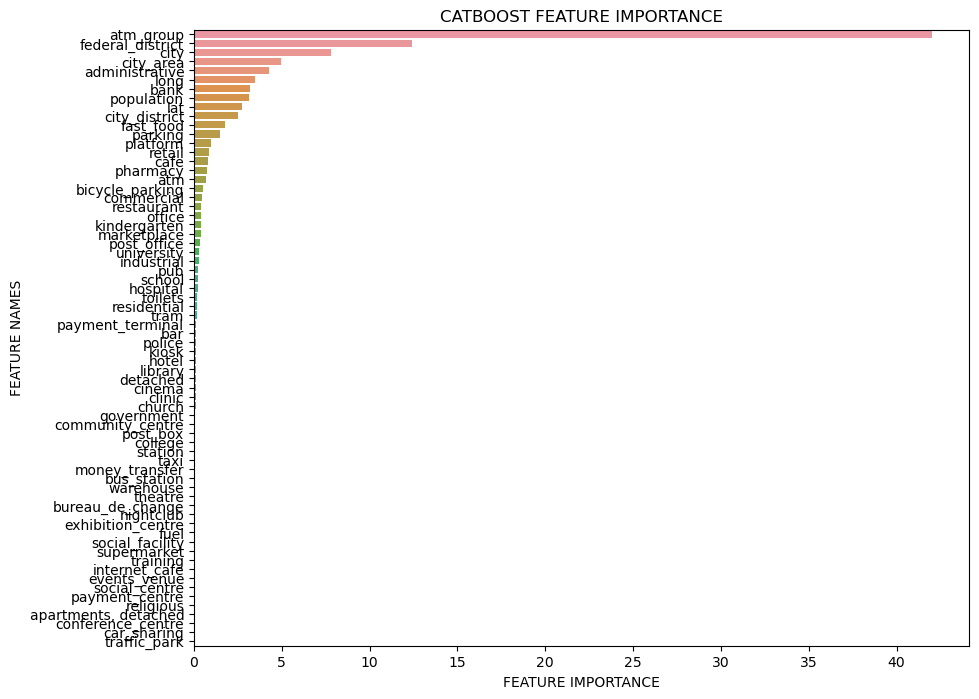

In [23]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
#plot the catboost result

plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST ')

In [24]:
f1_score(y_val, model.predict(X_val), average='micro')

0.6208732694355698

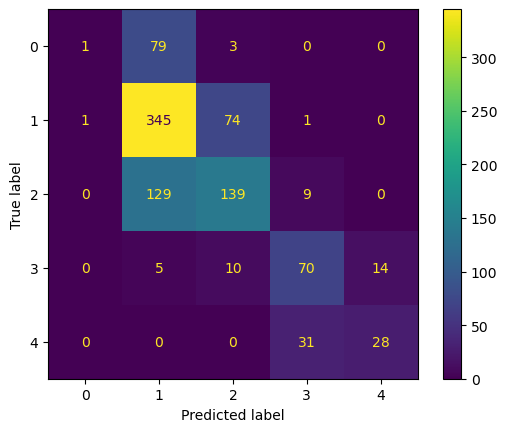

In [83]:
cm = confusion_matrix(y_val, model.predict(X_val))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [6]:
from datetime import datetime

today_date = datetime.today().strftime('%d-%m-%Y')
err = 0.612345

In [13]:
test_m = f'catboost_model_f1:{err}_date:{today_date}.csv'

In [20]:
float(test_m.split('.c')[0].split('_')[2].split(':')[-1])

0.612345

In [27]:
mdels = [
    'catboost_model_f1:60_date:20-05-2024', 
    'catboost_model_f1:62_date:20-05-2024', 
    'catboost_model_f1:61_date:20-05-2024'
    ]

In [28]:
best_score = 0

for mdl in mdels:
    score = float(mdl.split('.c')[0].split('_')[2].split(':')[-1])
    if score > best_score:
        best_score = score
        best_model = mdl
    
print(best_model)

catboost_model_f1:62_date:20-05-2024


In [34]:
print(f'./models/{best_model}')

<class 'str'>


In [35]:
df.atm_group.unique()

array(['32.0', '496.5', '1022.0', '1942.0', '3185.5', '5478.0', '8083.0'],
      dtype=object)

In [36]:
def get_area_features(df:pd.DataFrame) -> pd.DataFrame:
    addresses = []
    cities, city_areas, city_district, federal_district  = [], [], [], []

    geolocator = Nominatim(user_agent='your_app_name')
    coordinates = np.array([list(df.loc[idx][['lat', 'long']].tolist()) for idx in range(len(df))])
    
    for coordinate in coordinates:
        addresses.append(geolocator.reverse(coordinate))

    for add in addresses:
        try:
            cities.append(add.raw['address']['city'])
        except:
            cities.append('')
        try:
            city_areas.append(add.raw['address']['county'])
        except:
            city_areas.append('')
        try:
            city_district.append(add.raw['address']['quarter'])
        except:
            city_district.append('')
        try:
            federal_district.append(add.raw['address']['state'])
        except:
            federal_district.append('')

    df['city'] = cities
    df['city_area'] = city_areas
    df['city_district'] = city_district
    df['federal_district'] = federal_district

    return df

In [62]:
def get_objects(tags:list, df:pd.DataFrame, flag:bool = False) -> pd.DataFrame:
    if flag:
        col_names = []

        for idx in range(len(tags)):
            col = list(tags[idx].values())[0]
            col_names.append(col)
            col_names.append('id')
        
        dfs = []
        df_tmp = pd.DataFrame(columns=col_names)

        for idx in range(len(df)):
            if idx % 100 == 0:
                print(f'Current sample number: {idx}.')
                print(f'Parsed {idx/6250*100}% of samples.')

            point = df.loc[idx][['lat', 'long']].tolist()
            df_tmp.loc[0, 'id'] = df.loc[idx]['id']
            for tag in tags:
                try:
                    geodf = ox.features_from_point(
                        center_point=point,
                        tags=tag,
                        dist=100
                        ).reset_index()
                    df_tmp.loc[0, list(tag.values())[0]] = len(geodf)
                except:
                    df_tmp.loc[0, list(tag.values())[0]] = 0

            df_tmp = df_tmp.loc[:,~df_tmp.columns.duplicated()]
            dfs.append(df_tmp)
            df_final = pd.concat(dfs)
            df_final = pd.merge(df, df_final, on=['id'])

        return df_final       
    
    else:
        col_names = []

        for idx in range(len(tags)):
            col = list(tags[idx].values())[0]
            col_names.append(col)
            col_names.append('lat')
            col_names.append('long')

        df_final = pd.DataFrame(columns=col_names)

        for idx in range(len(df)):
            point = df.loc[idx][['lat', 'long']].tolist()
            df_final.loc[0, 'lat'] = point[0]
            df_final.loc[0, 'long'] = point[1]
            for tag in tags:
                try:
                    geodf = ox.features_from_point(
                        center_point=point,
                        tags=tag,
                        dist=100
                        ).reset_index()
                    df_final.loc[0, list(tag.values())[0]] = len(geodf)
                except:
                    df_final.loc[0, list(tag.values())[0]] = 0
            
            df_final = df_final.loc[:,~df_final.columns.duplicated()]
            df_final = pd.merge(df, df_final, on=['lat', 'long'])

        return df_final


def get_coords(geometry):
    lon = geometry.apply(lambda x: x.x if x.type == 'Point' else x.centroid.x)
    lat = geometry.apply(lambda x: x.y if x.type == 'Point' else x.centroid.y)
    
    return lat, lon


def get_population(df:pd.DataFrame) -> pd.DataFrame:
    
    houses = ['semidetached_house', 'terrace', 'detached', 'house']
    apartments = ['apartments' , 'dormitory']

    all_populations = []
    
    for idx in range(len(df)):
        try:
            population_resp = ox.features_from_point(center_point=df.iloc[idx][['lat', 'long']].tolist(), 
                       tags={'building' : [
                           'apartments' , 'dormitory','house', 'semidetached_house', 
                           'detached', 'terrace', 
                           ]}, dist=200).reset_index().fillna(1)
            
            population = (sum([int(x)*10*3 for x in population_resp[population_resp['building']
                                                                    .isin(apartments)]['building:levels'].tolist()])) + \
                         (sum([int(x)*3 for x in population_resp[population_resp['building']
                                                                 .isin(houses)]['building:levels'].tolist()]))

            all_populations.append(population)
        except:
            all_populations.append(0)

    df['population'] = all_populations

    return df

In [79]:
lats = [55.805827]
longs = [37.515146]
atm = ['32.0']

df = pd.DataFrame({'lat':lats, "long":longs, 'atm_group':atm})
df = get_area_features(df)

In [80]:
with open('objects.json') as json_file:
    data = json.load(json_file)

df = get_objects(data, df)

df = get_population(df)

cat_features=[
    'atm_group', 'city', 'city_area',
    'city_district', 'federal_district','administrative'
    ]


In [81]:
df.replace('', np.nan, inplace=True)
df[cat_features] = df[cat_features].fillna('no_data')
df['administrative'] = df['administrative'].apply(str)
df['atm_group'] = df['atm_group'].apply(str)
df = df.fillna(0)

/var/folders/wt/dr3521jx3dlf8ys18db161rc0000gn/T/ipykernel_1467/2102814518.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('', np.nan, inplace=True)
/var/folders/wt/dr3521jx3dlf8ys18db161rc0000gn/T/ipykernel_1467/2102814518.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_features] = df[cat_features].fillna('no_data')
/var/folders/wt/dr3521jx3dlf8ys18db161rc0000gn/T/ipykernel_1467/2102814518.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future versio

In [82]:
mode

,lat,long,atm_group,city,city_area,city_district,federal_district,fast_food,cafe,bar,...,supermarket,warehouse,religious,church,government,station,tram,platform,administrative,population
0,55.805827,37.515146,32.0,Москва,no_data,no_data,Москва,6,1,0,...,0,0,0,0,0,1,0,4,3,6990
